<a href="https://colab.research.google.com/github/KWierzbicka/Posi-/blob/main/Cwiczenia8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 8

## Wprowadzenie

### Jak działa KNN?

Algorytm KNN działa na zasadzie porównywania nowych danych z danymi już znanymi (tzw. treningowymi). Jego główną ideą jest to, że obiekty, które są "blisko siebie" (tzn. mają podobne cechy), są bardziej podobne do siebie i powinny być klasyfikowane w ten sam sposób. Działa to na zasadzie:

1. **Określenie liczby sąsiadów (K)** – użytkownik wybiera liczbę $ K $, czyli ile najbliższych sąsiadów należy brać pod uwagę przy klasyfikacji.
2. **Obliczanie odległości** – dla danego punktu (np. nowego przykładu, który chcemy sklasyfikować) algorytm oblicza odległość do wszystkich innych punktów w zbiorze treningowym (zwykle stosuje się metrykę Euklidesową, ale mogą to być inne odległości, jak Manhattan).
3. **Wybór K najbliższych sąsiadów** – algorytm wybiera $ K $ punktów z treningowego zbioru danych, które są najbliższe do punktu, który chcemy sklasyfikować.
4. **Klasyfikacja/średnia** – na podstawie klasy (dla klasyfikacji) lub wartości (dla regresji) $ K $ najbliższych sąsiadów, algorytm przypisuje etykietę nowemu punktowi. W przypadku klasyfikacji będzie to najczęściej najczęstsza klasa spośród $ K $ sąsiadów, a w przypadku regresji – średnia wartość.

<br>

#### Przykład:

Załóżmy, że masz zbiór danych o kwiatach, z dwoma cechami: długość i szerokość płatków. Chcesz sklasyfikować nowy kwiat. Algorytm KNN znajdzie $ K $ najbardziej podobnych kwiatów w zbiorze treningowym (np. 5 najbliższych) i przypisze nowemu kwiatowi etykietę na podstawie większości (np. "iris-setosa", jeśli 3 z 5 najbliższych są setosą).

<br>

#### Zalety i wady:

##### Zalety:
- Prosty do zrozumienia i implementacji.
- Nie wymaga treningu modelu, działa "na bieżąco".
- Może być używany do wielu typów danych (np. klasyfikacja, regresja).

##### Wady:
- **Wydajność obliczeniowa**: im większy zbiór danych, tym więcej operacji.
- **Wrażliwość na szum i nieistotne cechy.**
- Wymaga odpowiedniej metryki odległości (choć w niektórych przypadkach może być trudne do wyboru).


### Miary odległości

#### 1. Odległość Euklidesowa (Euclidean Distance)

Jest to najbardziej powszechnie stosowana metryka, szczególnie w klasycznych zadaniach klasyfikacji i regresji, gdy dane są ciągłe.

##### Wzór:

$$
d_E = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
$$

Gdzie:

- $ x_1, x_2, \dots, x_n $ to współrzędne punktu $ x $,
- $ y_1, y_2, \dots, y_n $ to współrzędne punktu $ y $,
- $ n $ to liczba wymiarów (cech).

##### Przykład:

Jeśli mamy dwa punkty w 2 wymiarach: $ x = (3, 4) $ i $ y = (7, 1) $, to odległość Euklidesowa między nimi to:

$$
d_E = \sqrt{(3 - 7)^2 + (4 - 1)^2} = \sqrt{(-4)^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5
$$

<br>

#### 2. Odległość Manhattan (Manhattan Distance)

Jest to alternatywna miara, która sumuje różnice współrzędnych punktów wzdłuż osi. Jest szczególnie użyteczna, gdy dane są zorganizowane w siatkę (np. w przypadku problemów związanych z ruchem w miastach).

##### Wzór:

$$
d_M = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_n - y_n|
$$

##### Przykład:

Dla punktów $ x = (3, 4) $ i $ y = (7, 1) $, odległość Manhattan to:

$$
d_M = |3 - 7| + |4 - 1| = 4 + 3 = 7
$$

<br>

#### 3. Odległość Minkowskiego (Minkowski Distance)

Jest ogólną formą obu powyższych metryk. Odległość Minkowskiego może przyjąć różne wartości w zależności od parametru $ p $.

##### Wzór:

$$
d_M = \left( |x_1 - y_1|^p + |x_2 - y_2|^p + \dots + |x_n - y_n|^p \right)^{1/p}
$$

Gdy $ p = 1 $, odległość Minkowskiego jest równa odległości Manhattan.

Gdy $ p = 2 $, jest to odległość Euklidesowa.

##### Przykład:

Dla punktów $ x = (3, 4) $ i $ y = (7, 1) $, jeśli $ p = 3 $:

$$
d_M = \left( |3 - 7|^3 + |4 - 1|^3 \right)^{1/3} = \left( 4^3 + 3^3 \right)^{1/3} = \left( 64 + 27 \right)^{1/3} = 91^{1/3} \approx 4.5
$$

<br>

#### Podsumowanie

W zależności od charakterystyki danych i problemu, możesz wybierać odpowiednią metrykę odległości:

- **Euklidesowa** – najczęściej stosowana w zadaniach ogólnych (ciągłe dane).
- **Manhattan** – dla danych, które dobrze opisują "ruch" w siatce.
- **Minkowski** – ogólna forma, pozwalająca na eksperymentowanie z parametrem $ p $.


## Zadanie 1
Dla zbioru danych `load_wine` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz klasyfikację cechy `target` z wykorzystaniem `KNN`. Sprawdź diałanie modelu dla różnych wartości `k-sąsiadów`. Pamiętaj o skalowaniu danych.

<br>

Przykład ładowania danych:

```
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target
```

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

In [4]:
print("Kształt danych:", X.shape)
print(X.head())
print(X.info())
print(X.describe())

Kształt danych: (178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  pro

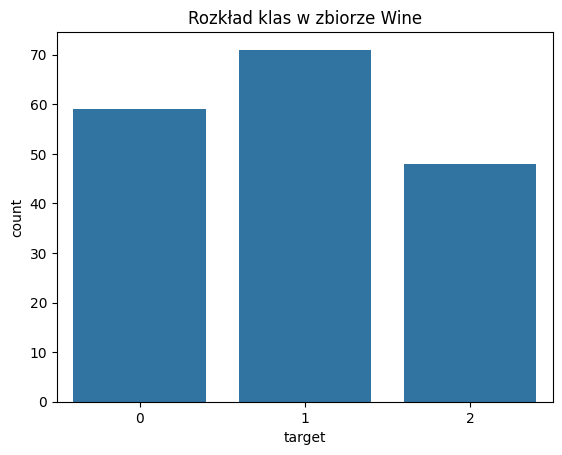

In [5]:
sns.countplot(x=y)
plt.title("Rozkład klas w zbiorze Wine")
plt.show()

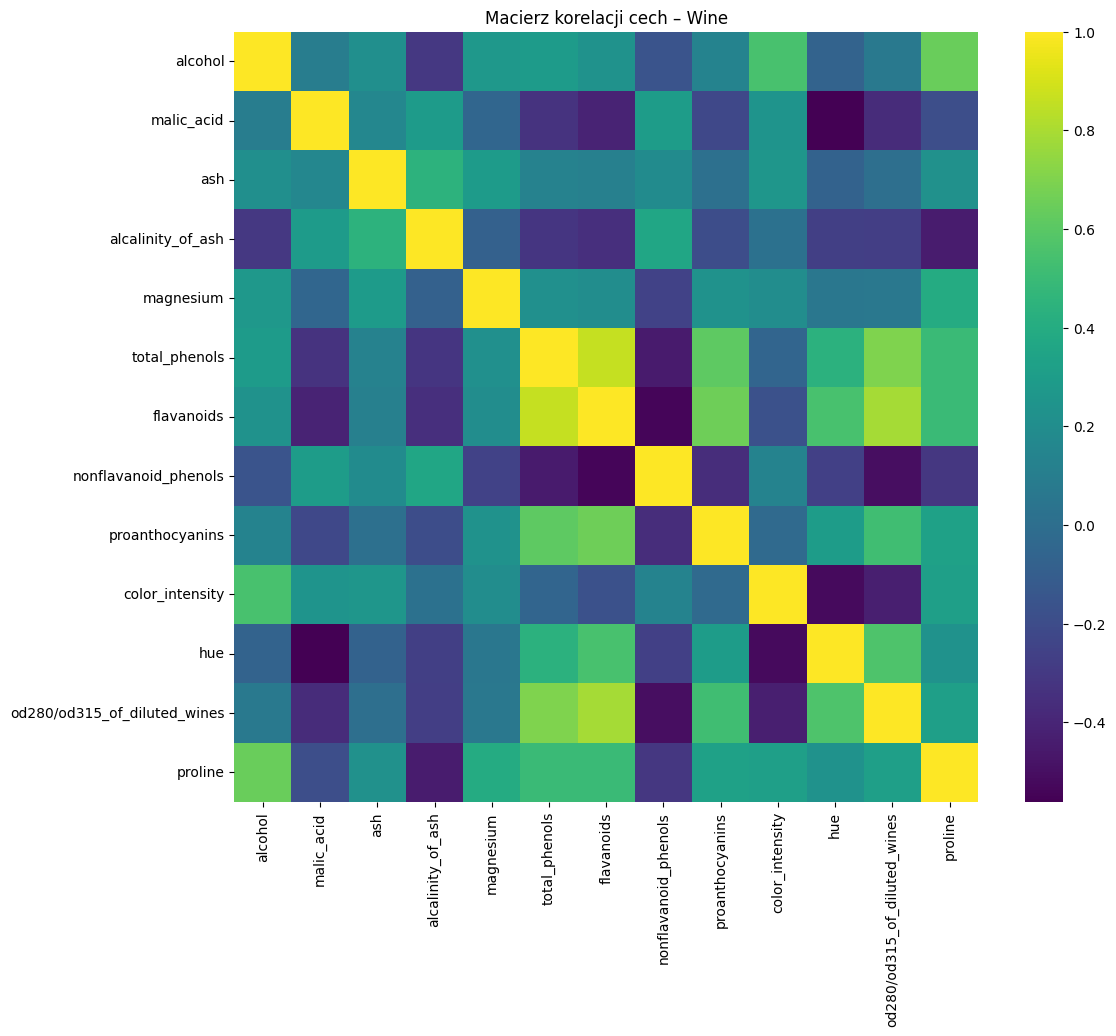

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap="viridis")
plt.title("Macierz korelacji cech – Wine")
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Wczytaj dane
wine = load_wine()
X = wine.data
y = wine.target

# 2. Podziel na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Stworzenie modelu KNN
k = 5  # liczba sąsiadów
knn = KNeighborsClassifier(n_neighbors=k)

# 5. Trenowanie
knn.fit(X_train_scaled, y_train)

# 6. Predykcja
y_pred = knn.predict(X_test_scaled)

# 7. Ocena modelu
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222
Confusion Matrix:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [9]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import manhattan_distances

# Wczytanie danych
wine = load_wine()
X = wine.data
y = wine.target

# Skalowanie danych (ważne dla KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wybierz 1 punkt (np. pierwszy)
x0 = X_scaled[0:1]

# Obliczamy odległości Manhattan do wszystkich próbek
distances = manhattan_distances(X_scaled, x0)

print(distances[:10])  # pierwsze 10 odległości

[[ 0.        ]
 [ 9.45567244]
 [ 8.26449963]
 [ 8.32625934]
 [10.9761645 ]
 [ 6.71827213]
 [ 6.07160828]
 [ 6.77695509]
 [ 6.98610975]
 [ 6.55589871]]


In [10]:
k = 5
idx = distances.flatten().argsort()[:k]
print("Indexy 5 najbliższych sąsiadów:", idx)
print("Klasy sąsiadów:", y[idx])


Indexy 5 najbliższych sąsiadów: [ 0 20 56 40 48]
Klasy sąsiadów: [0 0 0 0 0]


In [13]:
import numpy as np

def manhattan(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [12]:
def knn_predict(X_train, y_train, x_test, k=5, metric="manhattan"):
    # wybierz metrykę
    if metric == "manhattan":
        dist_func = lambda a, b: np.sum(np.abs(a - b))
    elif metric == "euclidean":
        dist_func = lambda a, b: np.linalg.norm(a - b)
    else:
        raise ValueError("Nieznana metryka")

    # oblicz odległości do wszystkich punktów treningowych
    distances = np.array([dist_func(x_test, x) for x in X_train])

    # indeksy k najbliższych
    idx = distances.argsort()[:k]

    # głosowanie większościowe
    labels, counts = np.unique(y_train[idx], return_counts=True)
    return labels[counts.argmax()]


In [14]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dane
wine = load_wine()
X = wine.data
y = wine.target

# Skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Predykcja wielu próbek
correct = 0
for i in range(len(X_test)):
    pred = knn_predict(X_train, y_train, X_test[i], k=5, metric="manhattan")
    if pred == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print("Accuracy własnego KNN (Manhattan):", accuracy)


Accuracy własnego KNN (Manhattan): 0.9444444444444444


## Zadanie 2
Dla zbioru danych `fetch_california_housing` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz regresję z wykorzystaniem `KNN`. Sprawdź diałanie modelu dla różnych wartości `k-sąsiadów`. Pamiętaj o skalowaniu danych.

<br>

Przykład ładowania danych:

```
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target
```

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target